<a href="https://colab.research.google.com/github/batuhancepni/keras_imdb/blob/main/imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
word_index = imdb.get_word_index()

1654784/1641221 [==============================] - 0s 0us/step


In [6]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [7]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [8]:
max([max(sequence) for sequence in train_data])

9999

In [9]:
import numpy as np

In [10]:
def vectorize_data(data, dimension=10000):
  results = np.zeros((len(data), dimension))
  for i, sequence in enumerate(data):
    results[i, sequence] = 1.
  return results

x_train = vectorize_data(train_data)
x_test = vectorize_data(test_data)


In [11]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [12]:
x_train[1]

array([0., 1., 1., ..., 0., 0., 0.])

In [13]:
  y_train = np.asarray(train_labels).astype('float32')
  y_test = np.asarray(test_labels).astype('float32')

In [14]:
print(y_train)
print(y_test)

[1. 0. 0. ... 0. 1. 0.]
[0. 1. 1. ... 0. 0. 0.]


In [68]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [69]:
from tensorflow.keras import optimizers

In [70]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

print(x_val.shape)
print(y_val.shape)

(10000, 10000)
(10000,)


In [71]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=25,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/25
30/30 [==============================] - 2s 60ms/step - loss: 0.4836 - acc: 0.7734 - val_loss: 0.3879 - val_acc: 0.8376
Epoch 2/25
30/30 [==============================] - 2s 51ms/step - loss: 0.2640 - acc: 0.9032 - val_loss: 0.2794 - val_acc: 0.8900
Epoch 3/25
30/30 [==============================] - 1s 50ms/step - loss: 0.1885 - acc: 0.9324 - val_loss: 0.2873 - val_acc: 0.8849
Epoch 4/25
30/30 [==============================] - 2s 51ms/step - loss: 0.1447 - acc: 0.9493 - val_loss: 0.2903 - val_acc: 0.8871
Epoch 5/25
30/30 [==============================] - 2s 50ms/step - loss: 0.1036 - acc: 0.9645 - val_loss: 0.3255 - val_acc: 0.8806
Epoch 6/25
30/30 [==============================] - 2s 50ms/step - loss: 0.0753 - acc: 0.9763 - val_loss: 0.4123 - val_acc: 0.8673
Epoch 7/25
30/30 [==============================] - 2s 51ms/step - loss: 0.0697 - acc: 0.9755 - val_loss: 0.3765 - val_acc: 0.8812
Epoch 8/25
30/30 [==============================] - 2s 51ms/step - loss: 0.0513 - a

In [72]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

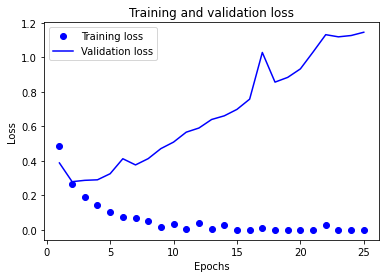

In [73]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values= history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']

epochs= range(1, len(acc_values) +1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

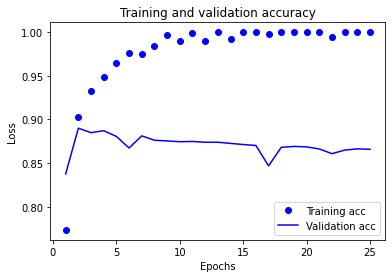

In [74]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [75]:
results = model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 1.2495 - acc: 0.8504


In [76]:
results

[1.249509572982788, 0.8504400253295898]

In [77]:
model.predict(x_test)

array([[1.19701035e-05],
       [1.00000000e+00],
       [1.00000000e+00],
       ...,
       [6.46770000e-04],
       [1.58071518e-04],
       [9.70311761e-01]], dtype=float32)